In [1]:

################################## import
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [11]:

################################## data in np array
x = np.array([50, 100, 150, 200, 250, 300, 350, 400, 450, 500]).reshape(-1, 1)
y = np.array([7.5, 10.2, 12.8, 14.5, 15.6, 16.0, 15.8, 15.0, 13.5, 11.2])

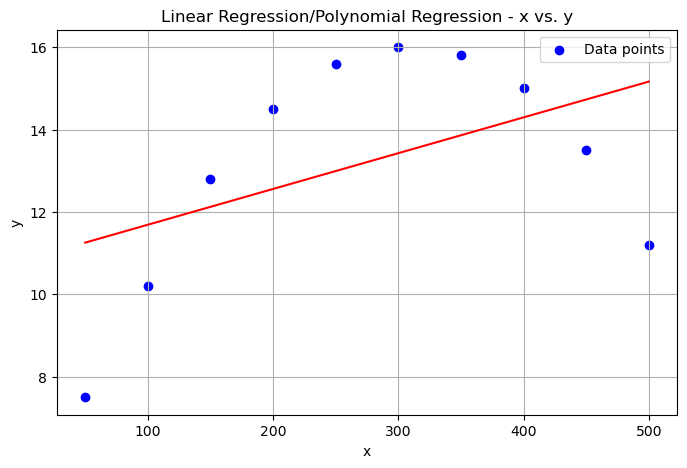

In [33]:
################################## scatter plot
plt.figure(figsize=(8, 5))
# create scatter plot of the points
plt.scatter(x, y, color='blue', label='Data points')
# Add labels in English
plt.title('Linear Regression/Polynomial Regression - x vs. y')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.plot(x, model.predict(x), color='red', label='Regression line')
# Create regression model
model = LinearRegression()
model.fit(x, y)


plt.show()



In [49]:
# Calculate MSE
mse = mean_squared_error(y, y_pred)
print(f"MSE: {mse:.3f}")

# Calculate MAE
y_pred=model.predict(x)
mae = mean_absolute_error(y, y_pred)
print(f"MAE: {mae:.3f}")

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.3f}")

#R^2
r2 = r2_score(y, y_pred)
print(f"R^2: {r2:.3f}")

#ADJ R
# Calculate adjusted R²
n = len(x)
p = x.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1) ## by the formula
print(f"Adjusted R²: {adj_r2:.2f}")


MSE: 5.545
MAE: 2.088
RMSE: 2.355
R^2: 0.219
Adjusted R²: 0.12


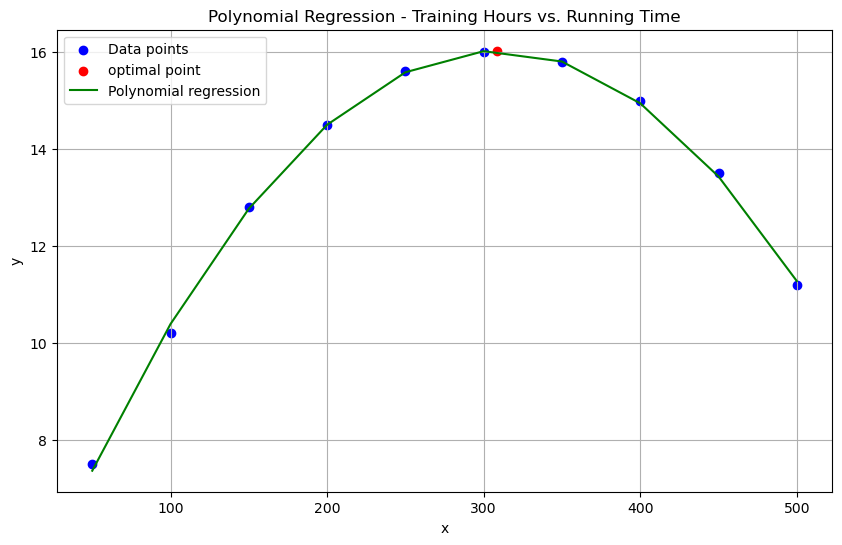

In [147]:
# Create polynomial regression model (degree 2) -- see explanation below
polynomial_model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),#poly- label of function
    ('linear', LinearRegression())
])

# Fit the model
polynomial_model.fit(x, y)
y_pred = polynomial_model.predict(x)

#find optimal:
#=-b/2a
coefficients = polynomial_model.named_steps['linear'].coef_
intercept = polynomial_model.named_steps['linear'].intercept_
c=intercept
a=coefficients[2]
b=coefficients[1]

x_opt=-1*b/(2*a)
y_opt=polynomial_model.predict([[x_opt]])

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data points')
plt.scatter([x_opt], [y_opt], color='red', label='optimal point')
plt.plot(x, y_pred, color='green', label='Polynomial regression')


# Add labels
plt.title('Polynomial Regression - Training Hours vs. Running Time')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

# Display equation on the graph
# plt.text(5, 90, equation, fontsize=12)

plt.show()

In [149]:
y_pred=polynomial_model.predict(x)
# Calculate MSE
mse = mean_squared_error(y, y_pred)
print(f"MSE: {mse:.3f}")

# Calculate MAE

mae = mean_absolute_error(y, y_pred)
print(f"MAE: {mae:.3f}")

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.3f}")

#R^2
r2 = r2_score(y, y_pred)
print(f"R^2: {r2:.3f}")

#ADJ R
# Calculate adjusted R²
n = len(x)
p = x.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1) ## by the formula
print(f"Adjusted R²: {adj_r2:.2f}")

MSE: 0.007
MAE: 0.059
RMSE: 0.084
R^2: 0.999
Adjusted R²: 1.00


In [155]:
# Get the coefficients
coefficients = polynomial_model.named_steps['linear'].coef_
intercept = polynomial_model.named_steps['linear'].intercept_

print(f"Intercept (β₀): {intercept:.2f}")
print(f"Coefficient (βi): {coefficients}")



# Equation
# equation = f"y = {intercept:.2f} + ({coefficients[1]:.6f})x + ({coefficients[2]:.6f})x²+ ({coefficients[3]:.6f})x3+ ({coefficients[4]:.6f})x4+ ({coefficients[5]:.6f})x5+ ({coefficients[6]:.6f})x6"
print(f"Polynomial equation: {equation}")

Intercept (β₀): 3.70
Coefficient (βi): [ 0.          0.07994091 -0.00012955]
Polynomial equation: y = 6.03 + (0.000011)x + (0.000809)x²+ (-0.000005)x3+ (0.000000)x4+ (-0.000000)x5+ (0.000000)x6


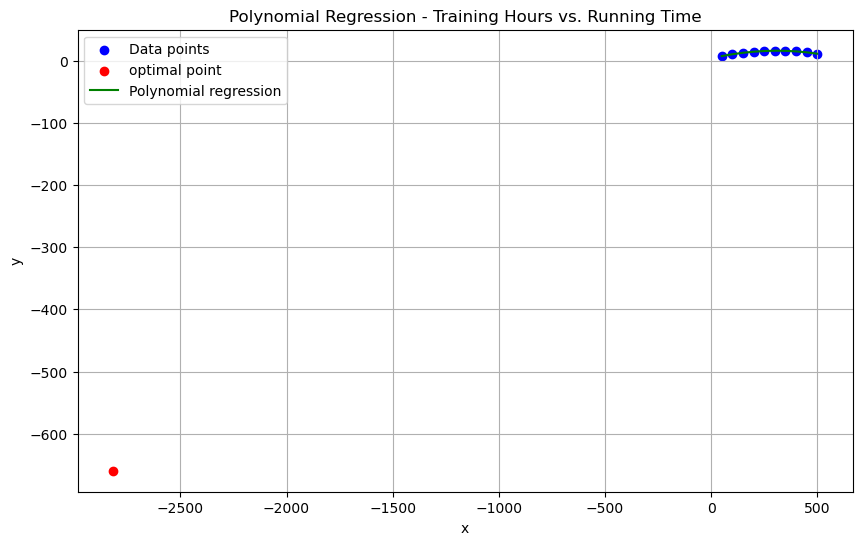

In [161]:
################################## polyfit
x = np.array([50, 100, 150, 200, 250, 300, 350, 400, 450, 500])
y = np.array([7.5, 10.2, 12.8, 14.5, 15.6, 16.0, 15.8, 15.0, 13.5, 11.2])

coeff_np=np.polyfit(x,y,deg=3)
poly_function=np.poly1d(coeff_np)
y_pred=poly_function(x)
# polynomial_model = Pipeline([
#     ('poly', PolynomialFeatures(degree=2)),#poly- label of function
#     ('linear', LinearRegression())
# ])

# Fit the model
# polynomial_model.fit(x, y)
# y_pred = polynomial_model.predict(x)

#find optimal:
#=-b/2a
# coefficients = polynomial_model.named_steps['linear'].coef_
# intercept = polynomial_model.named_steps['linear'].intercept_
c=coeff_np[2]
a=coeff_np[0]
b=coeff_np[1]

x_opt=-1*b/(2*a)
y_opt=poly_function([[x_opt]])

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data points')
plt.scatter([x_opt], [y_opt], color='red', label='optimal point')
plt.plot(x, y_pred, color='green', label='Polynomial regression')


# Add labels
plt.title('Polynomial Regression - Training Hours vs. Running Time')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

# Display equation on the graph
# plt.text(5, 90, equation, fontsize=12)

plt.show()